In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:

df=pd.read_csv('./Nombre_de_pannes_pfc101.csv', encoding='latin-1',sep=";", parse_dates=True)
df = df.rename(columns={'Earliest Date': 'Date début', 'Count of Ordre de travail': 'Number of Orders'})

In [3]:
df.to_csv('Nombre_de_pannes_pfc101.csv', index=False, encoding='latin-1',sep=";") 

In [4]:
df=pd.read_csv('./Nombre_de_pannes_pfc101.csv', encoding='latin-1',sep=";", parse_dates=True)

In [5]:
df['Date début'] = pd.to_datetime(df['Date début'])
df.index = df['Date début']
del df['Date début']
df.to_csv('Nombre_de_pannes_pfc101.csv', index=True, encoding='latin-1',sep=";") 
df=pd.read_csv('./Nombre_de_pannes_pfc101.csv', encoding='latin-1',sep=";",index_col="Date début", parse_dates=True)

In [6]:
df.head()

,Number of Orders
Date début,
2019-01-03,1.0
2019-01-04,1.0
2019-01-05,1.0
2019-01-06,0.0
2019-01-07,1.0


In [7]:
df.tail()

,Number of Orders
Date début,
2022-02-28,0.0
2022-03-01,0.0
2022-03-02,0.0
2022-03-03,0.0
2022-03-04,1.0


In [8]:
df=df.asfreq("D")

df.index

DatetimeIndex(['2019-01-03', '2019-01-04', '2019-01-05', '2019-01-06',
               '2019-01-07', '2019-01-08', '2019-01-09', '2019-01-10',
               '2019-01-11', '2019-01-12',
               ...
               '2022-02-23', '2022-02-24', '2022-02-25', '2022-02-26',
               '2022-02-27', '2022-02-28', '2022-03-01', '2022-03-02',
               '2022-03-03', '2022-03-04'],
              dtype='datetime64[ns]', name='Date début', length=1157, freq='D')

In [9]:
df=df.fillna(0)

In [10]:
df.tail()

,Number of Orders
Date début,
2022-02-28,0.0
2022-03-01,0.0
2022-03-02,0.0
2022-03-03,0.0
2022-03-04,1.0


In [11]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df, order=(5,1,6))
model_fit = model.fit()
print(model_fit.summary())

C:\Users\mahdi\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\mahdi\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:       Number of Orders   No. Observations:                 1157
Model:                 ARIMA(5, 1, 6)   Log Likelihood               -1340.660
Date:                Fri, 31 May 2024   AIC                           2705.321
Time:                        18:43:06   BIC                           2765.953
Sample:                    01-03-2019   HQIC                          2728.202
                         - 03-04-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4796      0.547      0.877      0.380      -0.592       1.551
ar.L2          0.2325      0.457      0.509      0.611      -0.664       1.129
ar.L3          0.2743      0.354      0.775      0.4

C:\Users\mahdi\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<AxesSubplot:>

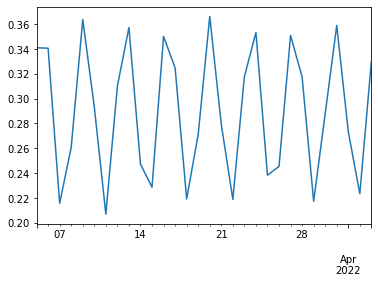

In [12]:
forecast_test = model_fit.forecast(30)

df1= forecast_test

df1.plot()

In [13]:
df1.tail()

2022-03-30    0.287894
2022-03-31    0.358880
2022-04-01    0.273338
2022-04-02    0.223442
2022-04-03    0.329959
Freq: D, Name: predicted_mean, dtype: float64

In [14]:
df1.to_csv('forcast_PFC101.csv', index=True, encoding='latin-1',sep=";") 

In [15]:
df=pd.read_csv('./forcast_PFC101.csv', encoding='latin-1',sep=";")

In [16]:
df.head()

,Unnamed: 0,predicted_mean
0,2022-03-05,0.340908
1,2022-03-06,0.340520
2,2022-03-07,0.215714
3,2022-03-08,0.260806
4,2022-03-09,0.363638


In [17]:
df.rename(columns={'Unnamed: 0':'date'}, inplace=True)

In [18]:
df.rename(columns={'predicted_mean':'arima-man'}, inplace=True)

In [19]:
df.head()

,date,arima-man
0,2022-03-05,0.340908
1,2022-03-06,0.340520
2,2022-03-07,0.215714
3,2022-03-08,0.260806
4,2022-03-09,0.363638


In [20]:
df.to_csv('forcast_PFC101.csv', index=False, encoding='latin-1',sep=";") 

In [21]:
df=pd.read_csv('./forcast_PFC101.csv', encoding='latin-1',sep=";",index_col="date", parse_dates=True)

In [22]:
df1=pd.read_csv('./Nombre_de_pannes_pfc101.csv', encoding='latin-1',sep=";",index_col="Date début", parse_dates=True)

In [23]:
df1.head()

,Number of Orders
Date début,
2019-01-03,1.0
2019-01-04,1.0
2019-01-05,1.0
2019-01-06,0.0
2019-01-07,1.0


In [24]:
import pmdarima as pm
sarima= pm.auto_arima(df1, m=7)

<AxesSubplot:xlabel='date'>

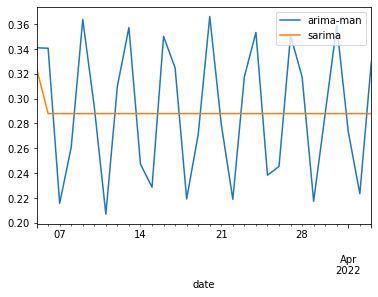

In [25]:
forecast_sarima = sarima.predict(n_periods=len(df))
df['sarima'] = list(forecast_sarima)

df.plot()

In [26]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [27]:
ses= SimpleExpSmoothing(np.asarray(df1['Number of Orders']))

In [28]:
ses_fit=ses.fit(optimized=True)

<AxesSubplot:xlabel='date'>

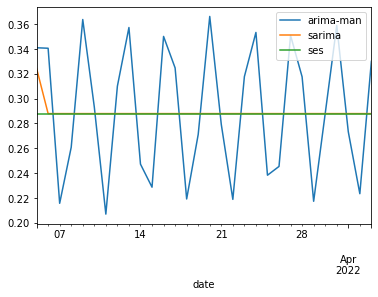

In [29]:
y_pred= ses_fit.forecast(len(df))
df['ses'] = list(y_pred)
df.plot()

In [30]:
from xgboost import XGBRegressor

In [31]:
xg_reg=XGBRegressor()

In [32]:
df3=pd.read_csv('./forcast_PFC101.csv', encoding='latin-1',sep=";",index_col="date", parse_dates=True)

In [33]:
df3.head()

,arima-man
date,
2022-03-05,0.340908
2022-03-06,0.340520
2022-03-07,0.215714
2022-03-08,0.260806
2022-03-09,0.363638


In [34]:
df1.insert(0,'null','')
df1['null'] = 0
df3.insert(0,'null','')
df3['null'] = 0

In [35]:
xg_fit=xg_reg.fit(df1.drop(['Number of Orders'], axis=1),df1['Number of Orders'])

In [36]:
 y_pred=xg_fit.predict(df3.drop(['arima-man'], axis=1))

In [37]:
df['xgboost'] =  list(y_pred)

In [38]:
df.head()

,arima-man,sarima,ses,xgboost
date,,,,
2022-03-05,0.340908,0.324346,0.287927,0.457217
2022-03-06,0.340520,0.287923,0.287927,0.457217
2022-03-07,0.215714,0.287923,0.287927,0.457217
2022-03-08,0.260806,0.287923,0.287927,0.457217
2022-03-09,0.363638,0.287923,0.287927,0.457217


In [39]:
df.to_csv('forcast_PFC101.csv', index=True, encoding='latin-1',sep=";") 

In [40]:
df=pd.read_csv('./forcast_PFC101.csv', encoding='latin-1',sep=";",index_col="date", parse_dates=True)

In [41]:
df.head()

,arima-man,sarima,ses,xgboost
date,,,,
2022-03-05,0.340908,0.324346,0.287927,0.457217
2022-03-06,0.340520,0.287923,0.287927,0.457217
2022-03-07,0.215714,0.287923,0.287927,0.457217
2022-03-08,0.260806,0.287923,0.287927,0.457217
2022-03-09,0.363638,0.287923,0.287927,0.457217


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 30 entries, 2022-03-05 to 2022-04-03
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   arima-man  30 non-null     float64
 1   sarima     30 non-null     float64
 2   ses        30 non-null     float64
 3   xgboost    30 non-null     float64
dtypes: float64(4)
memory usage: 1.2 KB
